In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from PIL import Image

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers  import Dense, Dropout, Flatten, Conv2D,MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.python.keras import utils
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

np.random.seed(42)

%matplotlib inline

In [3]:
# Look at list of first 5 images from Normal class
!ls ../input/chest_xray_3classes/chest_xray/train/NORMAL/* | head

../input/chest_xray_3classes/chest_xray/train/NORMAL/IM-0115-0001.jpeg
../input/chest_xray_3classes/chest_xray/train/NORMAL/IM-0117-0001.jpeg
../input/chest_xray_3classes/chest_xray/train/NORMAL/IM-0119-0001.jpeg
../input/chest_xray_3classes/chest_xray/train/NORMAL/IM-0122-0001.jpeg
../input/chest_xray_3classes/chest_xray/train/NORMAL/IM-0125-0001.jpeg
../input/chest_xray_3classes/chest_xray/train/NORMAL/IM-0127-0001.jpeg
../input/chest_xray_3classes/chest_xray/train/NORMAL/IM-0128-0001.jpeg
../input/chest_xray_3classes/chest_xray/train/NORMAL/IM-0129-0001.jpeg
../input/chest_xray_3classes/chest_xray/train/NORMAL/IM-0131-0001.jpeg
../input/chest_xray_3classes/chest_xray/train/NORMAL/IM-0133-0001.jpeg


Normal
Size of image:(1468, 993)


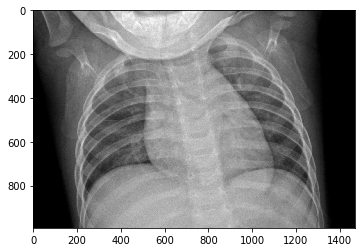

In [4]:
# Look at an example of a Normal chest X_ray
image_ex = load_img("../input/chest_xray_3classes/chest_xray/train/NORMAL/IM-0133-0001.jpeg")

print("Normal")
print(f"Size of image:{image_ex.size}")
plt.imshow(image_ex)
plt.show()

In [5]:
ls ../input/chest_xray_3classes/chest_xray/train/VIRUS/* | head

../input/chest_xray_3classes/chest_xray/train/VIRUS/person1000_virus_1681.jpeg
../input/chest_xray_3classes/chest_xray/train/VIRUS/person1003_virus_1685.jpeg
../input/chest_xray_3classes/chest_xray/train/VIRUS/person1004_virus_1686.jpeg
../input/chest_xray_3classes/chest_xray/train/VIRUS/person1005_virus_1688.jpeg
../input/chest_xray_3classes/chest_xray/train/VIRUS/person1007_virus_1690.jpeg
../input/chest_xray_3classes/chest_xray/train/VIRUS/person1008_virus_1691.jpeg
../input/chest_xray_3classes/chest_xray/train/VIRUS/person1009_virus_1694.jpeg
../input/chest_xray_3classes/chest_xray/train/VIRUS/person100_virus_184.jpeg
../input/chest_xray_3classes/chest_xray/train/VIRUS/person1010_virus_1695.jpeg
../input/chest_xray_3classes/chest_xray/train/VIRUS/person1015_virus_1701.jpeg


Virus
Size of image:(1048, 664)


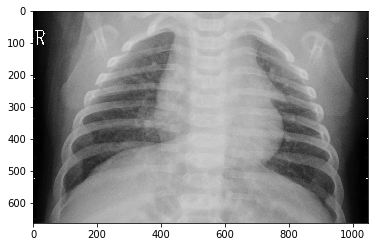

In [6]:
image_ex = load_img("../input/chest_xray_3classes/chest_xray/train/VIRUS/person1007_virus_1690.jpeg")

print("Virus")
print(f"Size of image:{image_ex.size}")
plt.imshow(image_ex)
plt.show()

In [7]:
ls ../input/chest_xray_3classes/chest_xray/train/BACTERIA/* | tail

../input/chest_xray_3classes/chest_xray/train/BACTERIA/person994_bacteria_2922.jpeg
../input/chest_xray_3classes/chest_xray/train/BACTERIA/person995_bacteria_2923.jpeg
../input/chest_xray_3classes/chest_xray/train/BACTERIA/person996_bacteria_2924.jpeg
../input/chest_xray_3classes/chest_xray/train/BACTERIA/person997_bacteria_2926.jpeg
../input/chest_xray_3classes/chest_xray/train/BACTERIA/person998_bacteria_2927.jpeg
../input/chest_xray_3classes/chest_xray/train/BACTERIA/person998_bacteria_2928.jpeg
../input/chest_xray_3classes/chest_xray/train/BACTERIA/person9_bacteria_38.jpeg
../input/chest_xray_3classes/chest_xray/train/BACTERIA/person9_bacteria_39.jpeg
../input/chest_xray_3classes/chest_xray/train/BACTERIA/person9_bacteria_40.jpeg
../input/chest_xray_3classes/chest_xray/train/BACTERIA/person9_bacteria_41.jpeg


Bacteria
Size of image:(1432, 1152)


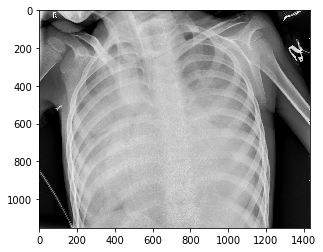

In [8]:
image_ex = load_img("../input/chest_xray_3classes/chest_xray/train/BACTERIA/person998_bacteria_2927.jpeg")

print("Bacteria")
print(f"Size of image:{image_ex.size}")
plt.imshow(image_ex)
plt.show()

Looking at the three images, I can see that most of the images are straight on images of the chest and the majority are straight. However, there are a few which are a little off center, so I will need a way to accomadate for this shift. Another observation is that the size of the images is not standard. The images are of different sizes  and some are zoomed in; I will need to combat this. 

In [9]:
# Directory paths
train_dir = "../input/chest_xray_3classes/chest_xray/train"
val_dir = "../input/chest_xray_3classes/chest_xray/val"
test_dir = "../input/chest_xray_3classes/chest_xray/test"

In [10]:
# InceptionV3
import tensorflow
from tensorflow.keras.applications.inception_v3 import InceptionV3

model = Sequential()

model.add(InceptionV3(include_top = False,
                      weights = 'imagenet',
                      input_shape=(150,150,3)))

# Dropout
model.add(Dropout(0.5))

# Pooling layer
model.add(GlobalAveragePooling2D())

# Dense layer
model.add(Dense(128, 
                activation = "relu"))

# Batch Normalizer
model.add(BatchNormalization())

# Output layer
model.add(Dense(3,
                activation = "softmax"))

In [11]:
# check size
model.input, model.output

(<tf.Tensor 'inception_v3_input:0' shape=(None, 150, 150, 3) dtype=float32>,
 <tf.Tensor 'dense_1/Identity:0' shape=(None, 3) dtype=float32>)

In [12]:
# Early Stopping
early_stop = EarlyStopping(monitor = "val_loss",
                           min_delta = 0,
                           patience = 3)

# Compile model
model.compile(loss = "categorical_crossentropy",
              optimizer = Adam(lr = 0.0001),
              metrics = ["accuracy"])


In [13]:
# Input shape
model.input_shape[1:3]

(150, 150)

In [14]:
# Data Generator 

#Defining image augmentation
train_idg = ImageDataGenerator(rescale = 1./255,
                               zoom_range = 0.2,
                               shear_range = 0.2,
                               rotation_range = 20,
                               horizontal_flip = True)

test_idg = ImageDataGenerator(rescale = 1./255)

#Creating data loaders
train_gen = train_idg.flow_from_directory(train_dir,
                                    model.input_shape[1:3],
                                    color_mode = "rgb",
                                    seed = 42,
                                    batch_size = 16, #8,16,32
                                    shuffle = True)

val_gen =  test_idg.flow_from_directory(val_dir,
                                    model.input_shape[1:3],
                                    color_mode = "rgb",
                                    seed = 42,
                                    batch_size = 16, 
                                    shuffle = True)

test_gen = test_idg.flow_from_directory(test_dir,
                                    model.input_shape[1:3],
                                    color_mode = "rgb",
                                    seed = 42,
                                    batch_size = 8,
                                    shuffle = False)

Found 5216 images belonging to 3 classes.
Found 16 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [15]:
# Fit model
hist = model.fit_generator(train_gen, 
                    validation_data = val_gen,
                    callbacks = [early_stop],
                    epochs = 20)

Epoch 1/20
326/326 [==============================] - 576s 2s/step - loss: 0.8278 - accuracy: 0.6622 - val_loss: 2.0416 - val_accuracy: 0.4375
Epoch 2/20
326/326 [==============================] - 576s 2s/step - loss: 0.5930 - accuracy: 0.7531 - val_loss: 1.0252 - val_accuracy: 0.6250
Epoch 3/20
326/326 [==============================] - 572s 2s/step - loss: 0.5407 - accuracy: 0.7696 - val_loss: 0.9401 - val_accuracy: 0.4375
Epoch 4/20
326/326 [==============================] - 581s 2s/step - loss: 0.5202 - accuracy: 0.7791 - val_loss: 0.6951 - val_accuracy: 0.5625
Epoch 5/20
326/326 [==============================] - 564s 2s/step - loss: 0.4801 - accuracy: 0.8000 - val_loss: 1.0112 - val_accuracy: 0.4375
Epoch 6/20
326/326 [==============================] - 558s 2s/step - loss: 0.4687 - accuracy: 0.8016 - val_loss: 0.6421 - val_accuracy: 0.6250
Epoch 7/20
326/326 [==============================] - 717s 2s/step - loss: 0.4530 - accuracy: 0.8144 - val_loss: 0.7614 - val_accuracy: 0.7500

In [16]:
# Evaluate model on test data.
scores = model.evaluate_generator(test_gen)
labels = model.metrics_names

# Show model performance
print(f'{labels[0]}: {scores[0]}')
print(f'{labels[1]}: {scores[1]* 100}%')

# Summary of the layers of the model
#model.summary()

loss: 0.39459671264884466
accuracy: 85.73718070983887%


In [17]:
# Predicted classes - Predicted Positives and Predicted Negatives 
predictions = model.predict_generator(test_gen)
predicted_classes = np.argmax(predictions,axis=1)

In [18]:
# True classes - True Positives and True Negatives 
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())   

In [19]:
# Create Report
report = metrics.classification_report(true_classes, 
                                       predicted_classes, 
                                       target_names = class_labels)
print(report)  

              precision    recall  f1-score   support

    BACTERIA       0.85      0.95      0.90       242
      NORMAL       0.95      0.82      0.88       234
       VIRUS       0.75      0.77      0.76       148

    accuracy                           0.86       624
   macro avg       0.85      0.85      0.84       624
weighted avg       0.86      0.86      0.86       624



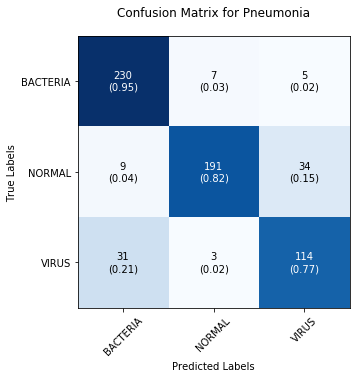

In [20]:
# Create Confusion Matrix
cm = metrics.confusion_matrix(true_classes,predicted_classes)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5),
                                class_names = class_labels,
                                show_normed = True)
ax.set(title = "Confusion Matrix for Pneumonia",
       ylabel = "True Labels",
       xlabel = "Predicted Labels")
plt.show()

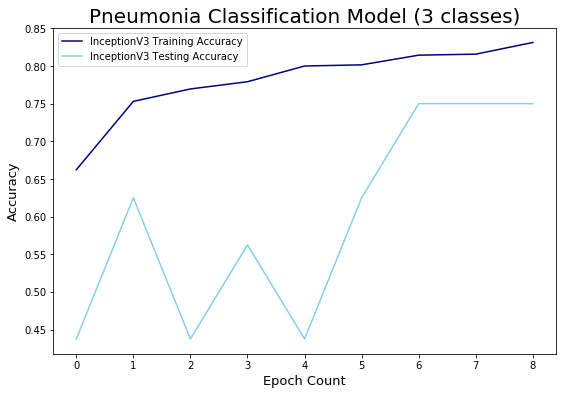

In [25]:
# Plot
train_loss = hist.history["accuracy"]
test_loss = hist.history["val_accuracy"]
plt.figure(figsize = (9,6))


plt.plot(train_loss, label = "InceptionV3 Training Accuracy", color = "navy")
plt.plot(test_loss, label = "InceptionV3 Testing Accuracy" , color= "skyblue")
plt.title("Pneumonia Classification Model (3 classes)", fontsize = 20)
plt.xlabel("Epoch Count", fontsize = 13)
plt.ylabel("Accuracy", fontsize = 13)
plt.legend();

Correction: The graph above says the light blue line is the InceptionV3 Testing Accuracy but it is actually the Validation Accuracy. 

In [21]:
# save weights from this model model
model.save_weights("../output/3classes_inception_model.h5")